In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

%matplotlib inline

In [48]:
data = pd.read_csv('vinamilk.csv')
data = data.drop(columns = ['price_change', 'change_percentage']) # Hai cột chứa dữ liệu rỗng nên mình cần loại bỏ nó
data

,date,open_price,highest_price,lowest_price,close_price,volume
0,2/12/2024,"64,600.00","64,800.00","64,200.00","64,500.00","1,229,100.00"
1,29/11/2024,"64,500.00","64,800.00","64,300.00","64,600.00","1,105,500.00"
2,28/11/2024,"65,000.00","65,000.00","64,500.00","64,500.00","1,273,300.00"
3,27/11/2024,"64,800.00","65,000.00","64,500.00","64,600.00","1,586,400.00"
4,26/11/2024,"64,500.00","65,000.00","64,400.00","64,800.00","1,675,600.00"
...,...,...,...,...,...,...
995,7/12/2020,"89,759.88","91,324.50","89,595.18","90,583.36","1,970,400.00"
996,4/12/2020,"90,171.62","90,336.32","89,595.18","89,759.88","1,763,720.00"
997,3/12/2020,"89,759.88","90,501.01","89,595.18","90,171.62","1,527,440.00"
998,2/12/2020,"90,253.97","90,418.66","89,512.83","89,759.88","1,332,460.00"


- Ngày (Date): Ngày của mỗi bản ghi dữ liệu cổ phiếu.
- Giá Mở Cửa (Opening Price): Mức giá mà cổ phiếu bắt đầu giao dịch.
- Giá Cao Nhất (Highest Price): Mức giá __cao__ nhất mà cổ phiếu đạt được trong ngày.
- Giá Thấp Nhất (Lowest Price): Mức giá __thấp__ nhất mà cổ phiếu đạt được trong ngày.
- Giá Đóng Cửa (Closing Price): Mức giá cuối cùng mà cổ phiếu được giao dịch trong ngày giao dịch thông thường.
- Khối Lượng (Volume): Số lượng tài sản hoặc chứng khoán được chuyển nhượng trong một khoảng thời gian, thường là trong một ngày.

# Làm sạch dữ liệu

In [4]:
data.dtypes # Kiểm tra loại dữ liệu của từng đặc trưng

date             object
open_price       object
highest_price    object
lowest_price     object
close_price      object
volume           object
dtype: object

In [49]:
# Chuyển đổi dữ liệu từ dạng chuỗi (String) xuống dạng số 
columns = ['open_price', 'highest_price', 'lowest_price', 'close_price', 'volume']

for column in columns:
    if column == 'volume':    
        data[column] = data[column].str.replace(",", "").astype(float).astype(np.int64)
        break
    data[column] = data[column].str.replace(",", "").astype(float)

In [50]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y') # Định dạng lại dữ liệu ngày tháng năm


In [7]:
data.dtypes

date             datetime64[ns]
open_price              float64
highest_price           float64
lowest_price            float64
close_price             float64
volume                    int64
dtype: object

In [ ]:
data.isnull().sum() # Kiểm tra dữ liệu thiếu

date             0
open_price       0
highest_price    0
lowest_price     0
close_price      0
volume           0
dtype: int64

In [8]:
data.drop(columns=['date']).describe() # Mô tả dữ liệu

,open_price,highest_price,lowest_price,close_price,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,70543.207830,71175.777870,69914.117880,70466.107970,3.145894e+06
std,7294.355461,7334.574113,7199.214127,7277.131423,1.778174e+06
min,56654.680000,57873.060000,56132.510000,56132.510000,6.913000e+05
25%,65059.485000,65618.040000,64555.010000,64995.862500,1.981825e+06
50%,69056.425000,69813.055000,68402.885000,69115.495000,2.762100e+06
75%,73871.240000,74465.990000,73204.890000,73870.320000,3.895750e+06
max,96821.850000,97403.610000,95907.650000,96655.630000,2.156490e+07


In [9]:
data

,date,open_price,highest_price,lowest_price,close_price,volume
0,2024-12-02,64600.00,64800.00,64200.00,64500.00,1229100
1,2024-11-29,64500.00,64800.00,64300.00,64600.00,1105500
2,2024-11-28,65000.00,65000.00,64500.00,64500.00,1273300
3,2024-11-27,64800.00,65000.00,64500.00,64600.00,1586400
4,2024-11-26,64500.00,65000.00,64400.00,64800.00,1675600
...,...,...,...,...,...,...
995,2020-12-07,89759.88,91324.50,89595.18,90583.36,1970400
996,2020-12-04,90171.62,90336.32,89595.18,89759.88,1763720
997,2020-12-03,89759.88,90501.01,89595.18,90171.62,1527440
998,2020-12-02,90253.97,90418.66,89512.83,89759.88,1332460


# Exploratory Data Analysis (Phân tích dữ liệu khai phá)

In [51]:
data.index = data['date'] # Biến index của tập dữ liệu thành ngày tháng năm
data = data.sort_index(ascending=True)

### Giá cổ phiếu theo thời gian (Cuối 2020 - cuối 2024)

Giá đóng cửa của cổ phiếu là chuẩn mực được các nhà đầu tư sử dụng để theo dõi hiệu suất của cổ phiếu theo thời gian.

Text(0.5, 1.0, 'Giá cổ phiếu của Vinamilk từ cuối 2020 đến cuối 2024')

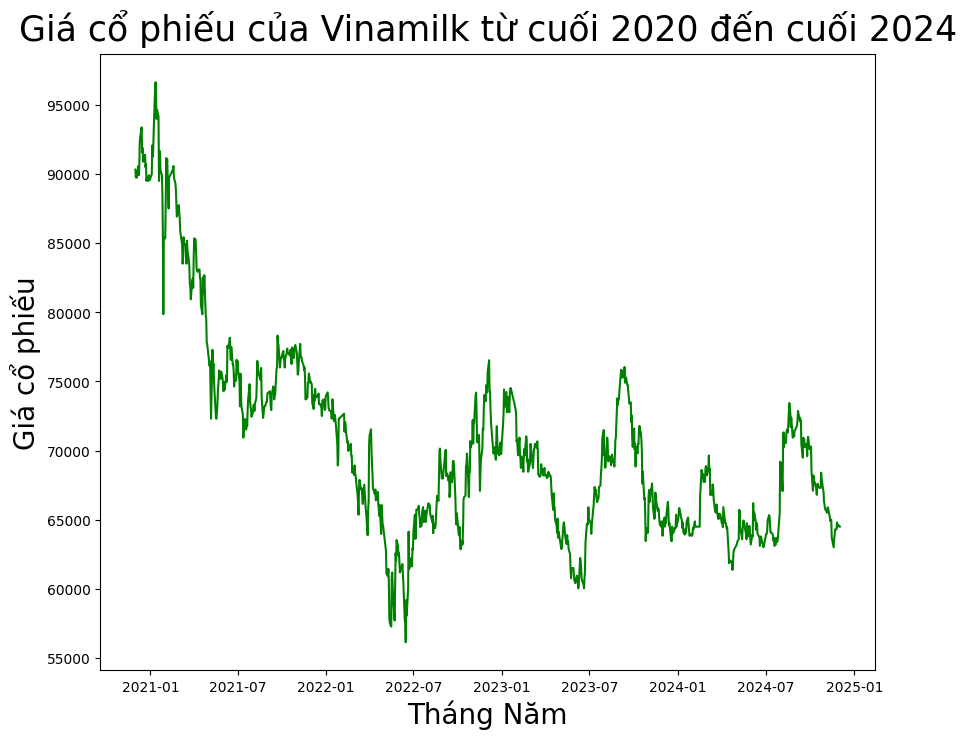

In [11]:
plt.figure(figsize=(10,8))
plt.plot(data['close_price'], color='g')
plt.xlabel('Tháng Năm',size=20)
plt.ylabel('Giá cổ phiếu',size=20)
plt.title('Giá cổ phiếu của Vinamilk từ cuối 2020 đến cuối 2024',size=25, pad=10)

### Sự phân bố của giá cổ phiếu (giá đóng cửa)

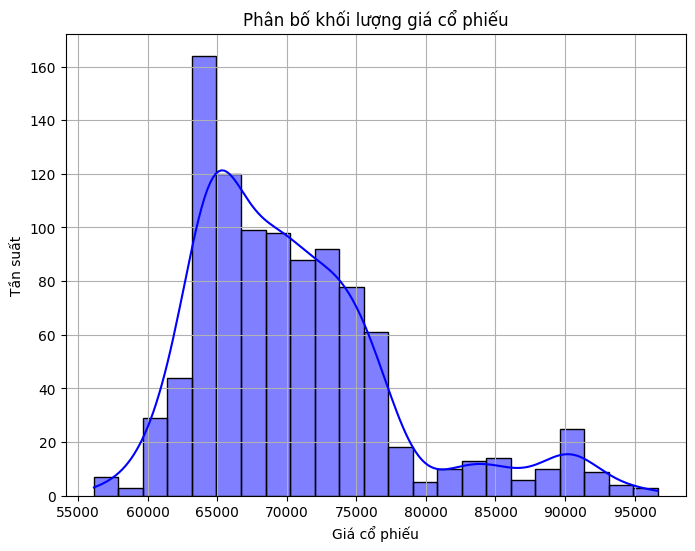

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data['close_price'], kde=True, color='blue')
plt.title('Phân bố khối lượng giá cổ phiếu')
plt.xlabel('Giá cổ phiếu')
plt.ylabel('Tần suất')
plt.grid()
plt.show()

- Biểu đồ này cho thấy giá cổ phiếu tương đối ổn định, với hầu hết giá tập trung quanh phạm vi trong khoảng 65,000–75,000 đồng.

### Khối lượng giao dịch theo thời gian (Cuối 2020 - cuối 2024)

Khối lượng là số lượng tài sản hoặc chứng khoán được trao đổi trong một khoảng thời gian, thường là trong một ngày. Ví dụ, khối lượng giao dịch chứng khoán sẽ đề cập đến số lượng cổ phiếu chứng khoán được giao dịch giữa thời điểm mở cửa và đóng cửa hàng ngày. Khối lượng giao dịch và những thay đổi về khối lượng trong suốt thời gian là những thông tin đầu vào quan trọng đối với các nhà giao dịch kỹ thuật.

Text(0.5, 1.0, 'Khối lượng giao dịch từ cuối 2020 đến cuối 2024')

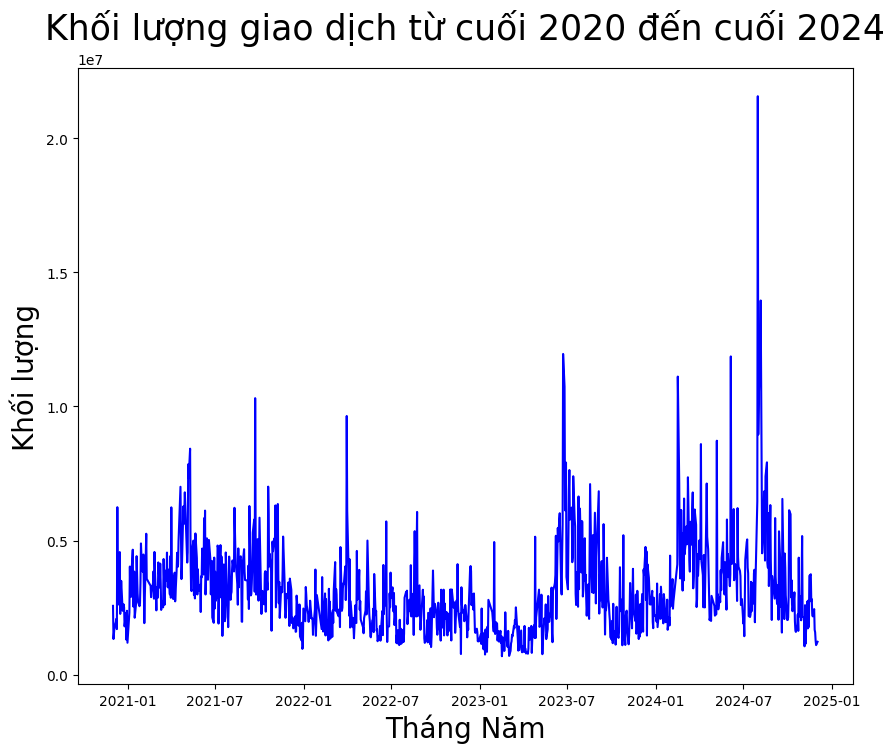

In [13]:
plt.figure(figsize=(10,8))
plt.plot(data['volume'], color='b')
plt.xlabel('Tháng Năm',size=20)
plt.ylabel('Khối lượng',size=20)
plt.title('Khối lượng giao dịch từ cuối 2020 đến cuối 2024',size=25, pad=10)

In [14]:
data[data['volume'] == data['volume'].max()] # Dữ liệu có khối lượng giao dịch cao nhất

,date,open_price,highest_price,lowest_price,close_price,volume
date,,,,,,
2024-07-31,2024-07-31,66197.87,69580.25,66197.87,69193.69,21564900


### Sự phân bố của khối lượng giao dịch

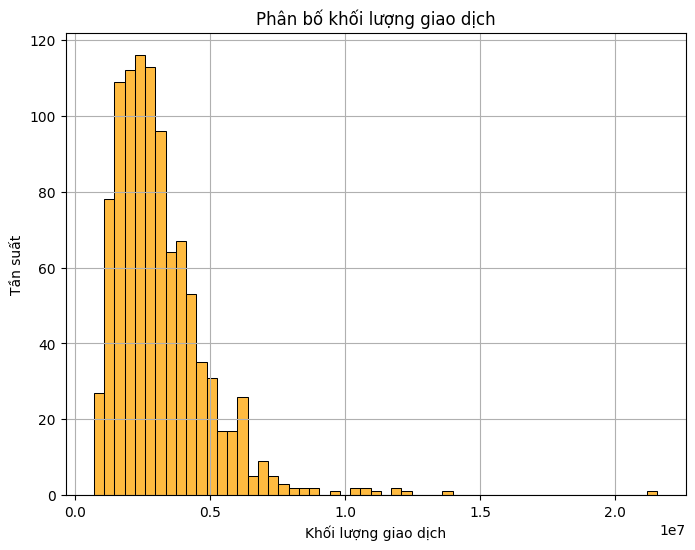

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data['volume'], color='orange')
plt.title('Phân bố khối lượng giao dịch')
plt.xlabel('Khối lượng giao dịch')
plt.ylabel('Tần suất')
plt.grid()
plt.show()

- Biểu đồ này cho thấy khối lượng giao dịch tương đối ổn định, tập trung quanh phạm vi trong khoảng 1 triệu – 5 triệu đồng.
- Có một số trường hợp khối lượng giao dịch lớn hơn 10 triệu cổ phiếu.

### Chuyển động giá cả

Trung bình động (Moving Average) là một phương pháp lọc ra nhiễu và làm mượt các biến động giá cổ phiếu khó nhìn để giúp mình quan sát xu hướng thị trường tốt hơn, và dữ liệu này hoàn toàn dựa trên giá cả từ quá khứ. Bằng việc tập trung vào độ dốc của đường trung bình, mình có thể biết tốt hơn về hướng đi tiềm năng của giá cả thị trường.

Text(0.5, 1.0, 'Dữ liệu')

<Figure size 1600x800 with 0 Axes>

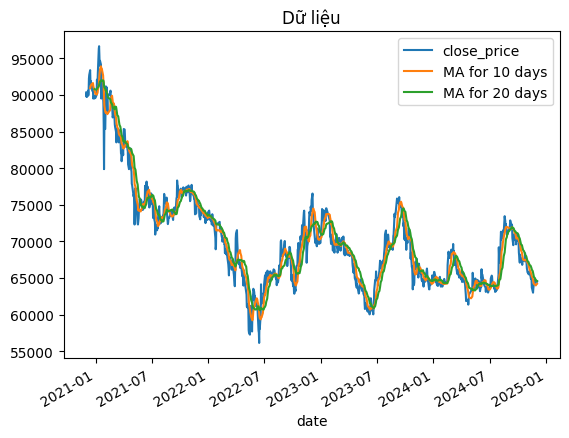

In [16]:
ma_day = [10, 20] # Tính trung bình động ngắn hạn (10 ngày) và dài hạn (20 ngày)
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['close_price'].rolling(ma).mean()

plt.figure(figsize=(16,8))
data[['close_price', 'MA for 10 days', 'MA for 20 days']].plot()
plt.title('Dữ liệu')

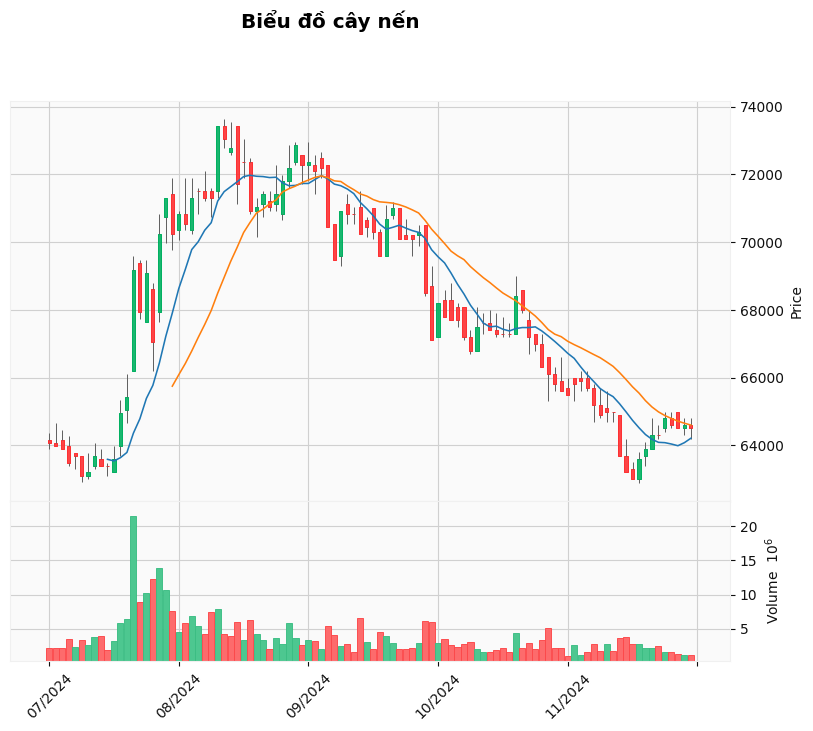

In [58]:
data1 = data[['open_price', 'highest_price', 'lowest_price', 'close_price', 'volume']].copy()
data1.columns = ['Open', 'High', 'Low', 'Close', 'Volume'] # Đổi tên các cột để xây dựng biểu đồ hình nến

mpf.plot(
    data1[int(len(data1)*0.90):], # Lấy 100 dữ liệu từ 100 ngày trước 
    type='candle', # Biểu đồ dạng hình nến
    volume=True, # Hiện dữ liệu khối lượng
    mav=[10, 20],
    title = "Biểu đồ cây nến",
    figsize = (10, 8),
    style='yahoo',
    datetime_format='%m/%Y'
)

- Nến xanh: Biểu thị những ngày giá đóng cửa cao hơn giá mở cửa (ngày giá tăng).
- Nến đỏ: Biểu thị những ngày giá đóng cửa thấp hơn giá mở cửa (ngày giá giảm).
- Bóng nến (Bấc nến): Các đường mỏng ở trên và dưới thân nến biểu thị giá cao nhất và thấp nhất trong ngày.

Về xu hướng nửa cuối 2024, cổ phiếu có vẻ như đã giảm liên tục từ tháng 8 đến tháng 11, vì cả đường trung bình động (MA) ngắn hạn và dài hạn đều tuột dốc không phanh.

Khối lượng:
- Có sự gia tăng đột biến về khối lượng giao dịch từ cuối tháng 7 đến đầu tháng 8 năm 2024.
- Khối lượng thấp hơn được nhìn thấy khi giá tiếp tục giảm, cho thấy xu hướng đang dần yếu đi.

Đối với mối quan hệ giữa đường trung bình động (MA), đường màu xanh lam (MA 10 ngày) liên tục nằm dưới đường màu cam (MA 20 ngày) từ giữa tháng 8, thể hiện xu hướng giá giảm mạnh.

### Sự tương quan giữa các đặc trưng

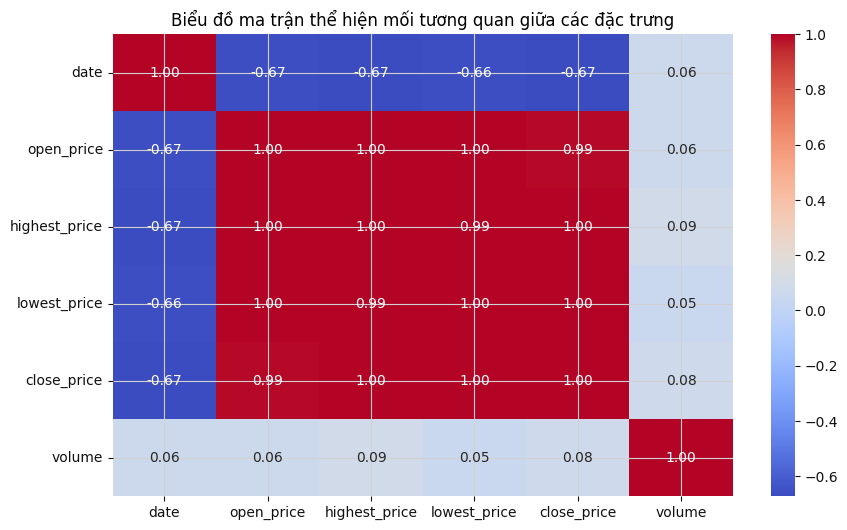

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Biểu đồ ma trận thể hiện mối tương quan giữa các đặc trưng')
plt.show()

Các đặc trưng liên quan đến giá cổ phiếu hoàn toàn phụ thuộc lẫn nhau.

Đối với đặc trưng khối lượng (volume) từ bản đồ nhiệt, mình biết được nó không hoàn toàn có liên quan đến biến động giá cả.

### Giá thay đổi hàng ngày

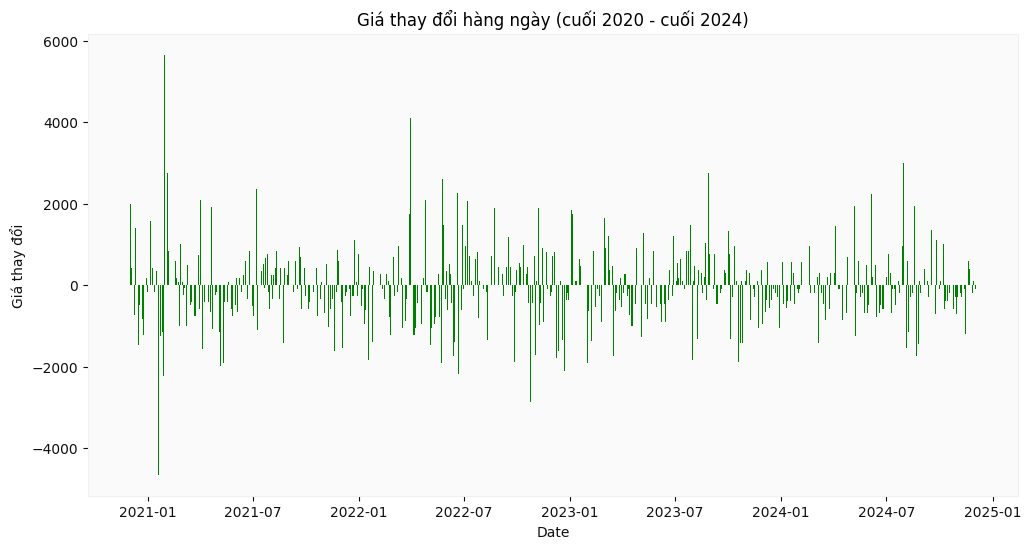

In [19]:
data['price_change'] = data['close_price'] - data['open_price']
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['price_change'], color='green')
plt.title('Giá thay đổi hàng ngày (cuối 2020 - cuối 2024)')
plt.xlabel('Date')
plt.ylabel('Giá thay đổi')
plt.grid()
plt.show()

- Có những đợt giá tăng đột biến đáng chú ý (cả tăng và giảm), chẳng hạn như vào đầu năm 2021 và giữa năm 2022.
- Vào đầu năm 2023, giá cả có vẻ ít biến động hơn, với mức giá thay đổi nhỏ hơn. Ám chỉ rằng giá cổ phiểu tương đối ổn định

### Biến động giá hàng ngày

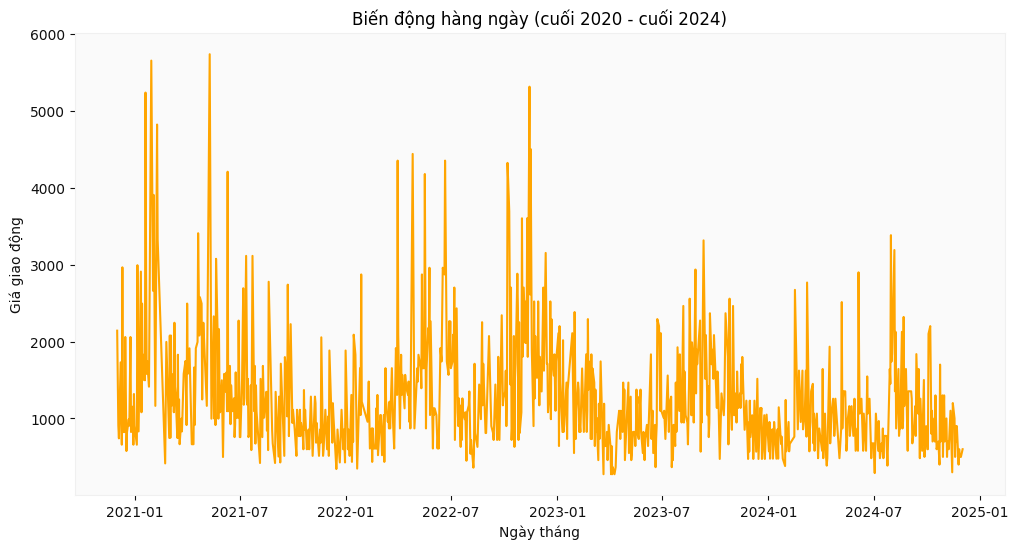

In [20]:
data['volatility'] = data['highest_price'] - data['lowest_price']
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['volatility'], color='orange')
plt.title('Biến động hàng ngày (cuối 2020 - cuối 2024)')
plt.xlabel('Ngày tháng')
plt.ylabel('Giá giao động')
plt.grid()
plt.show()

- Trong giai đoạn đầu 2021, cổ phiếu có mức biến động cao, thể hiện ở các đợt tăng đột biến cao hơn. 
- Theo thời gian, mức biến động dường như giảm dần, đặc biệt là vào năm 2023 và 2024.

### Giá cổ phiếu trung bình theo tháng/năm

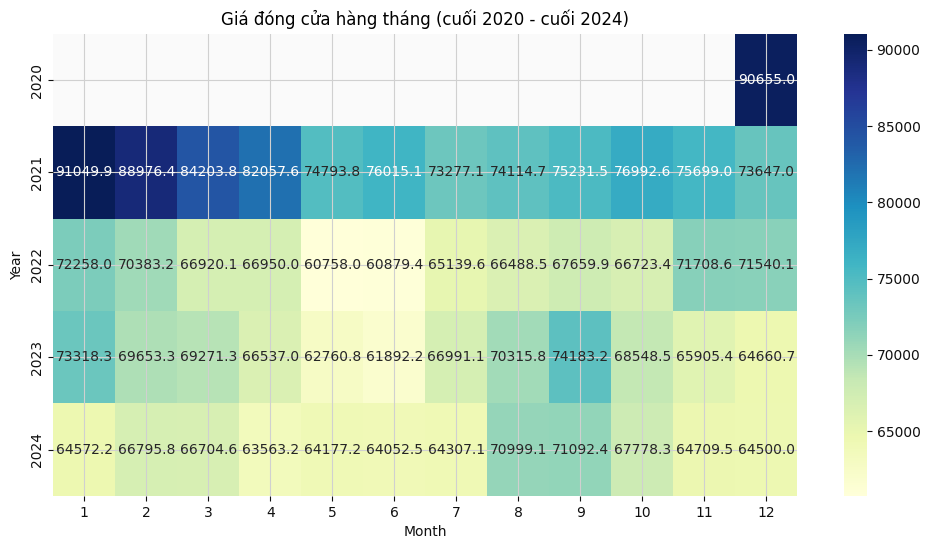

In [21]:
data['Year'] = data.index.year
data['Month'] = data.index.month

monthly_mean = data.groupby(['Year', 'Month'])['close_price'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_mean, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Giá đóng cửa hàng tháng (cuối 2020 - cuối 2024)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

- Cuối năm 2020 - năm 2021: có giá cổ phiếu hàng tháng cao trong khoảng thời gian này.
- Năm 2022 - năm 2024: có sự suy giảm đều trong giá cổ phiếu hàng tháng.

# Sử dụng học máy để dự đoán giá cổ phiếu

In [22]:
from math import ceil

In [23]:
# data.shape (1000, 10)
shape = data.shape[0]
print(shape)

1000


In [42]:
data_new = data[['close_price']]
train_set = data_new[:ceil(shape*0.85)] # Lấy 85% dữ liệu đầu (từ cuối 2020 - cuối 2023) để huấn luyện
valid_set = data_new[ceil(shape*0.85):] # Lấy 15% dữ liệu cuối (từ cuối 2023 - hiện tại) để thử
print('Hình dạng tập huấn luyện:',train_set.shape)
print('Hình dạng tập',valid_set.shape)

Hình dạng tập huấn luyện: (850, 1)
Hình dạng tập (150, 1)


In [ ]:
target_data = data_new[['close_price']] # giá cổ phiểu để huấn luyện và so sánh với kết quả dự đoán

##### K-Nearest Neighbors (Regressor)

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import datetime as dt

def KNR_(target_data):  
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(target_data)
    
    X_train, y_train = [], []
    for i in range(50, len(train_set)): # khoảng từ 50 đến 850
        # Cứ mỗi 50 dữ liệu vào x_train, mình đưa dữ liệu thứ 51 vào nhãn (y_train)
        X_train.append(scaled_data[i- 50: i, 0]) # Lấy 50 dữ liệu liên tục
        y_train.append(scaled_data[i])

    #### Chia dữ liệu cho tập thử
    test_set = scaled_data[len(train_set) - 50: , :] # shape: (200, 1)
    X_test, y_test = [], target_data[len(train_set):]
    for i in range(50, len(test_set)):
        X_test.append(test_set[i - 50: i, 0])
    
    # Chuyển đổi dữ liệu danh sách xuổng dạng mảng 2 chiều
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    
    # Mô hình dự đoán
    model = KNeighborsRegressor()
    
    param = {'n_neighbors': np.arange(2, 30),
             'weights': ['uniform', 'distance'],
             'p': [1,2]} # các tham số
    model_grid = GridSearchCV(model, param, cv=5) # sử dụng grid search để tìm ra tham số tốt nhất cho mô hình
    model_grid.fit(X_train, y_train)
    predictions_test = model_grid.predict(X_test)
    predictions_test = scaler.inverse_transform(predictions_test)
    print(model_grid.get_params())
    # Các thông số đánh giá dự đoán lên tập thử
    mae = mean_absolute_error(y_test, predictions_test)
    mse = mean_squared_error(y_test, predictions_test)
    r2score = r2_score(y_test, predictions_test)
    test_evaluation = [mae, mse, r2score]

    return predictions_test, test_evaluation

In [64]:
preds, test = KNR_(target_data)

print("Các thông số dự đoán lên TẬP THỬ:",
      "\nTính sai số tuyệt đối trung bình (MAE):", test[0],
      "\nTính sai số bình phương trung bình (MSE):", test[1],
      "\nTính sai số bình phương trung bình căn hai (RMSE):", np.sqrt(test[1]),
      "\nTính điểm R bình phương (R^2 score):", test[2])

{'cv': 5, 'error_score': nan, 'estimator__algorithm': 'auto', 'estimator__leaf_size': 30, 'estimator__metric': 'minkowski', 'estimator__metric_params': None, 'estimator__n_jobs': None, 'estimator__n_neighbors': 5, 'estimator__p': 2, 'estimator__weights': 'uniform', 'estimator': KNeighborsRegressor(), 'n_jobs': None, 'param_grid': {'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), 'weights': ['uniform', 'distance'], 'p': [1, 2]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}
Các thông số dự đoán lên TẬP THỬ: 
Tính sai số tuyệt đối trung bình (MAE): 1621.9408314369605 
Tính sai số bình phương trung bình (MSE): 4059913.3803052655 
Tính sai số bình phương trung bình căn hai (RMSE): 2014.9226735299956 
Tính điểm R bình phương (R^2 score): 0.5813366723732241


- **MAE** = ~1622: 
    - Trên trung bình, các dự đoán của mô hình chênh lệch khoảng ~1.622 đồng so với giá cổ phiếu thực tế.
- **MSE** = ~4059913: 
    - Trên trung bình, các sai số dự đoán giá cổ phiếu bình phương xấp xỉ khoảng 4.06 triệu đồng
- **RMSE** = ~2015: 
    - Trung bình các dự đoán giá cổ phiếu của mô hình có sai số khoảng 2.015 đồng.
- **R2-Score** = ~0.58134: 
    - Mô hình có thể giải thích được tới 58,134% sự thay đổi trong giá cổ phiếu

C:\Users\renny\AppData\Local\Temp\ipykernel_24076\459142160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Predictions_KNN'] = preds


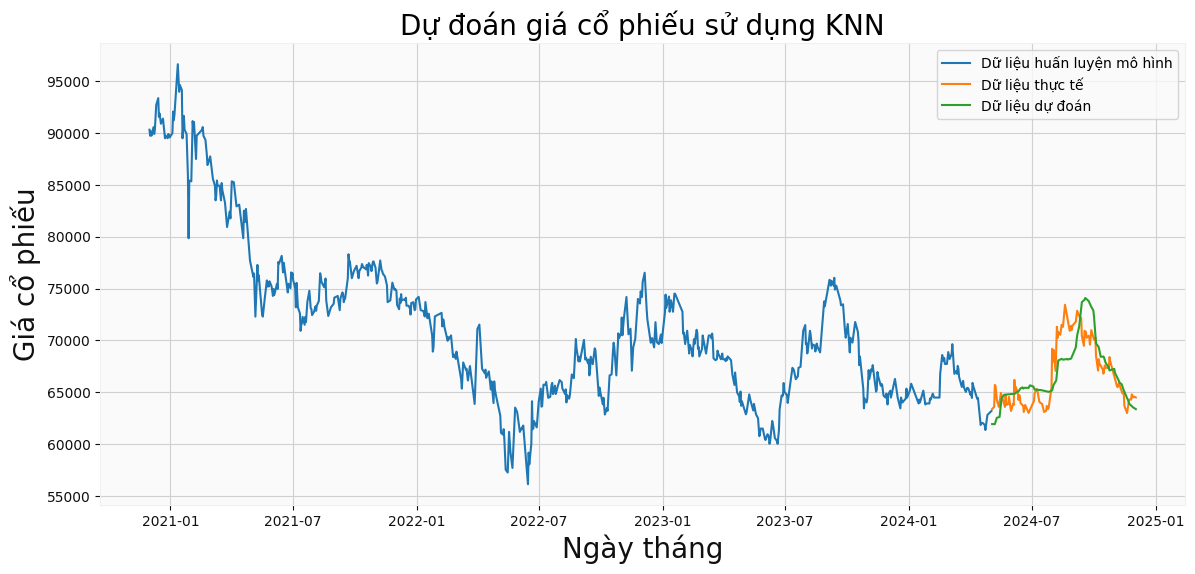

In [47]:
valid_set['Predictions_KNN'] = preds
plt.figure(figsize=(14,6))
plt.plot(train_set['close_price'])
plt.plot(valid_set[['close_price', 'Predictions_KNN']])
plt.xlabel('Ngày tháng',size=20)
plt.ylabel('Giá cổ phiếu',size=20)
plt.title('Dự đoán giá cổ phiếu sử dụng KNN',size=20)
plt.legend(['Dữ liệu huấn luyện mô hình','Dữ liệu thực tế','Dữ liệu dự đoán'])

Sử dụng K-NN (K-láng giềng gần nhất) ban đầu để kiểm tra khả năng dự đoán dựa trên các điểm dữ liệu gần nhất. Tuy nhiên, do mô hình không có khả năng xử lý tính tuần tự của dữ liệu chuỗi thời gian, nên kết quả dự đoán kém, đặc biệt với dữ liệu phức tạp như giá cổ phiếu. Mô hình không thể học được xu hướng dài hạn và mối quan hệ phức tạp trong dữ liệu, dẫn đến kết quả không ổn định và độ chính xác thấp.

##### LSTM (Long short-term memory)

Mô hình "Trí nhớ ngắn hạn dài lâu" được sử dụng rộng rãi cho các vấn đề dự đoán dạng chuỗi. Lý do mà nó hoạt động tốt đến vậy là vì mô hình này có thể lưu trữ các dữ liệu cũ quan trọng, và quên đi những dữ liệu không quan trọng.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

def LSTM_(target_data):   
    scaler = MinMaxScaler(feature_range=(0, 1)) # Sử dụng 1 scikit-learn transformer để tiền xử lý dữ liệu
    scaled_data = scaler.fit_transform(target_data)
    
    #### Chia dữ liệu cho tập huấn luyện
    X_train, y_train = [], []
    for i in range(50, len(train_set)): # khoảng từ 50 đến 850
        # Cứ mỗi 50 dữ liệu vào x_train, mình đưa dữ liệu thứ 51 vào tập nhãn (y_train)
        X_train.append(scaled_data[i- 50: i, 0]) # Lấy 50 dữ liệu liên tục
        y_train.append(scaled_data[i, 0]) # Lấy dữ liệu của ngày thứ i

    #### Chia dữ liệu cho tập thử
    test_set = scaled_data[len(train_set) - 50: , :] # shape: (200, 1)
    X_test, y_test = [], target_data[len(train_set):, :] # y_test shape: (150, 1)
    for i in range(50, len(test_set)):
        X_test.append(test_set[i - 50: i, 0])
    
    # Chuyển đổi dữ liệu danh sách xuổng dạng mảng 2 chiều
    X_train = np.array(X_train) # shape: (800, 50)
    y_train = np.array(y_train) # shape: (800,)
    X_test = np.array(X_test) # shape: (150, 50)

    # Chuyển đổi dữ liệu thành mảng 1 chiều
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # after reshaping: (800, 50, 1)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 )) # after reshaping: (150, 50, 1)
    # print(x_train.shape) (800, 50, 1)
    
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1],1))) # input_shape = (50, 1)
    model.add(LSTM(64))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss = 'mean_squared_error') # hàm mất mát = mean_squared_error
    model.fit(X_train, y_train, batch_size=1, epochs=1)
    
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2score = r2_score(y_test, predictions)
    test_evaluation = [mae, mse, r2score]
    
    return predictions, test_evaluation

In [ ]:
preds, test = LSTM_(target_data)
print("Tính sai số tuyệt đối trung bình (MAE):", test[0],
      "\nTính sai số bình phương trung bình (MSE):", test[1],
      "\nTính sai số bình phương trung bình căn hai (RMSE):", np.sqrt(test[1]),
      "\nTính điểm R bình phương (R^2 score):", test[2])

5/5 [==============================] - 0s 10ms/step
Tình sai số tuyệt đối trung bình (MAE): 794.9726572916662 
Tính sai số bình phương trung bình (MSE): 1292917.2230155056 
Tính sai số bình phương trung bình căn hai (RMSE): 1137.0651797568623 
Tính điểm R bình phương (R^2 score): 0.8666727646063863


- **MAE** = ~795: 
    - Trên trung bình, các dự đoán của mô hình chênh lệch khoảng ~795 đồng so với giá cổ phiếu thực tế.
- **MSE** = ~1292917: 
    - Trên trung bình, các sai số dự đoán giá cổ phiếu bình phương xấp xỉ khoảng 1,3 triệu đồng
- **RMSE** = ~1137: 
    - Trung bình các dự đoán giá cổ phiếu của mô hình có sai số khoảng 1,137 đồng.
- **R2-Score** = ~0.86667: 
    - Mô hình có thể giải thích được 86.667% sự thay đổi trong giá cổ phiếu

C:\Users\renny\AppData\Local\Temp\ipykernel_17620\3826530100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions_LSTM'] = preds


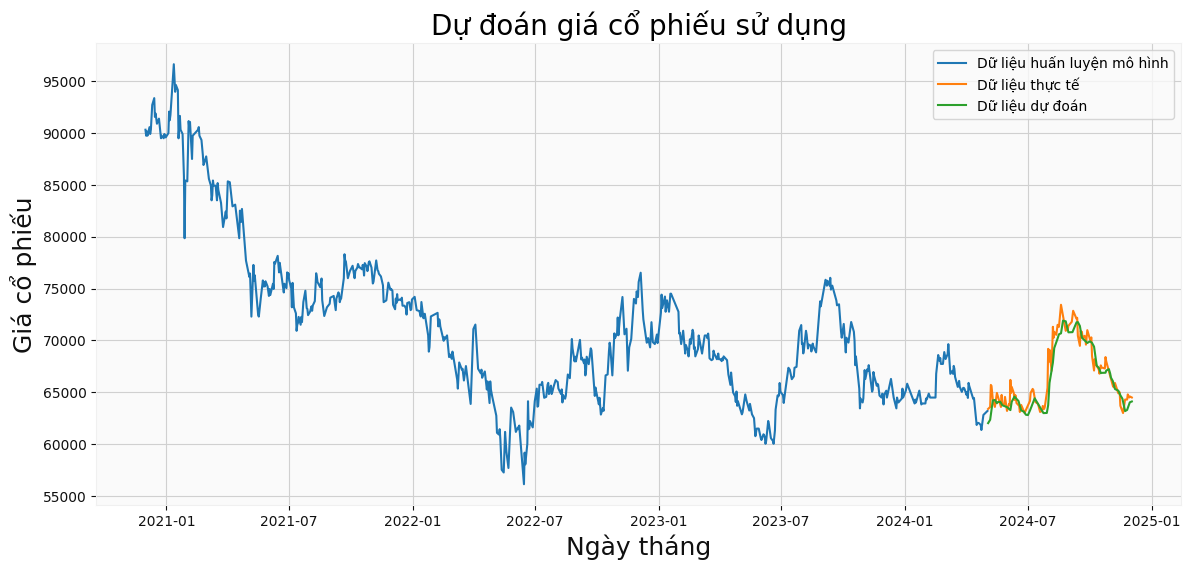

In [ ]:
train = data.iloc[:len(train_set)]
valid = data.iloc[len(train_set):]
valid['Predictions_LSTM'] = preds
# Visualize the data
plt.figure(figsize=(14,6))
plt.plot(train['close_price'])
plt.plot(valid[['close_price', 'Predictions_LSTM']])
plt.xlabel('Ngày tháng', size=18)
plt.ylabel('Giá cổ phiếu', size=18)
plt.title('Dự đoán giá cổ phiếu sử dụng LSTM', size=20)
plt.legend(['Dữ liệu huấn luyện mô hình','Dữ liệu thực tế','Dữ liệu dự đoán'])
plt.show()

Sử dụng LSTM (Trí nhớ ngắn hạn dài lâu) để dự đoán giá cổ phiếu vì đây là một loại mạng nơ-ron được thiết kế đặc biệt để xử lý dữ liệu có tính tuần tự, như chuỗi thời gian. Giá cổ phiếu có xu hướng phụ thuộc vào các giá trị trước đó, và LSTM rất hiệu quả trong việc ghi nhớ những thông tin dài hạn và phát hiện các xu hướng này trong dữ liệu.